## Transfer Learning

*Prepared by:*  
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

In this notebook, we’ll explore transfer learning. First, we’ll train a neural network model from scratch, and then we’ll see how using a pre-trained model can significantly boost performance.

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')

sns.set_palette('Set2')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

## Simple CNN Model

We'll start by building a simple CNN model for comparison. I'll skip the detailed explanation since I've already covered this in a previous lecture and notebook. To keep training and inference efficient, we'll use 5,000 samples for training and 1,000 for testing—still solid sample sizes for our purposes.

### Data Preparation

In [2]:
import tensorflow as tf
from tensorflow import keras

from keras.utils import to_categorical

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Extract the random 1k samples
random_indices_train = np.random.choice(train_images.shape[0], 5000, replace=False)
random_indices_test = np.random.choice(test_images.shape[0], 1000, replace=False)
train_images_sampled = train_images[random_indices_train]
test_images_sampled = test_images[random_indices_test]
train_labels_sampled = train_labels[random_indices_train]
test_labels_sampled = test_labels[random_indices_test]

# Normalize pixel values to be between 0 and 1
train_images = train_images_sampled / 255.0
test_images = test_images_sampled / 255.0

# Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels_sampled)
test_labels = to_categorical(test_labels_sampled)

train_images.min(), train_images.max()

(0.0, 1.0)

In [3]:
train_labels.shape, test_labels.shape

((5000, 10), (1000, 10))

### Building the model

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,450 (349.41 KB)

 Trainable params: 89,450 (349.41 KB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.1462 - loss: 2.2419 - val_accuracy: 0.2670 - val_loss: 1.9387
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.3099 - loss: 1.8591 - val_accuracy: 0.3240 - val_loss: 1.7574
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.3812 - loss: 1.6532 - val_accuracy: 0.3740 - val_loss: 1.6387
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.4445 - loss: 1.5163 - val_accuracy: 0.4200 - val_loss: 1.5336
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.4914 - loss: 1.4033 - val_accuracy: 0.4490 - val_loss: 1.4979
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.5317 - loss: 1.3177 - val_accuracy: 0.4720 - val_loss: 1.4350
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.5527 - loss: 1.2530 - val_accuracy: 0.4940 - val_loss: 1.4075
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.5758 - loss: 1.1874 - val_ac

### Performance Evaluation

We can see that we have achieved around 52% test accuracy with a simple CNN model.

32/32 - 0s - 12ms/step - accuracy: 0.5180 - loss: 1.3812


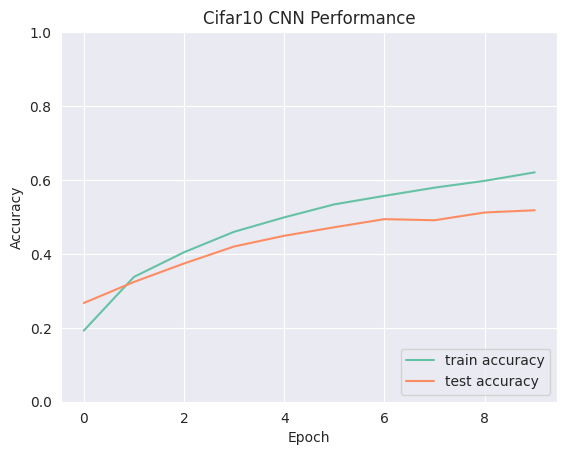

In [6]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Cifar10 CNN Performance')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Introduction to Transfer Learning

Transfer learning leverages features from a model trained on one problem to tackle a related task—like using cat breed detection model to help identify other feline creatures such as lion and tiger. This approach is especially useful when data is limited, making training a full model from scratch impractical.

### Transfer learning workflow

The typical workflow in deep learning transfer learning involves:

- `Reusing Pre-trained Model`: Import layers and weights from an already trained model.
- `Freezing`: Lock these layers to preserve their learned information. We set `trainable = False`.
- `Adding New Layers`: Stack new, trainable layers on top of the base model that adapt the existing features to predictions on your specific dataset.
- `Fine-tuning (Optional)`: Unfreeze part (or all) of the model and training it on new data with a low learning rate. This can further refine features, enhancing performance for the new task.
- `Training on New Data`: Train the new model on your dataset.

### Building our base model: MobileNetV2

MobileNetV2 is a deep neural network architecture designed by Google for efficient mobile and edge device applications. It builds on its predecessor, MobileNetV1, by improving both speed and accuracy while minimizing computational costs, making it ideal for devices with limited resources like smartphones and IoT devices.

I'll be using <a href="https://keras.io/api/applications/mobilenet/">MobileNetV2 base model</a> in this notebook as it is very lightweight and Google Colaboratory's memory limit can handle it. This is also one of the available pre-trained models in Keras. Normally, I'd make use of more powerful ones.

In [8]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

HEIGHT = 96
WIDTH = 96

base_model = MobileNetV2(weights='imagenet',
                      include_top=False,
                      input_shape=(HEIGHT, WIDTH, 3),
                      classes=train_labels.shape[1])

base_model.summary(show_trainable=True)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_1          │ (None, 96, 96, 3)    │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ Conv1 (Conv2D)         │ (None, 48, 48, 32)   │          864 │ input_layer_1[0][0] │    Y    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ bn_Conv1               │ (None, 48, 48, 32)   │          128 │ Conv1[0][0]         │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ Conv1_relu (ReLU)      │ (None, 48, 48, 32)   │            0 │ bn_Conv1[0][0]      │    -    │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 48, 48, 32)   │          288 │ Conv1_relu[0][0]    │    Y    │
│ (DepthwiseConv2D)      │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 48, 48, 32)   │          128 │ expanded_conv_dept… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_depthwi… │ (None, 48, 48, 32)   │            0 │ expanded_conv_dept… │    -    │
│ (ReLU)                 │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_project  │ (None, 48, 48, 16)   │          512 │ expanded_conv_dept… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ expanded_conv_project… │ (None, 48, 48, 16)   │           64 │ expanded_conv_proj… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand         │ (None, 48, 48, 96)   │        1,536 │ expanded_conv_proj… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand_BN      │ (None, 48, 48, 96)   │          384 │ block_1_expand[0][… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_expand_relu    │ (None, 48, 48, 96)   │            0 │ block_1_expand_BN[… │    -    │
│ (ReLU)                 │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_pad            │ (None, 49, 49, 96)   │            0 │ block_1_expand_rel… │    -    │
│ (ZeroPadding2D)        │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ block_1_depthwise      │ (None, 24, 24, 96)   │          864 │ block_1_pad[0][0]   │    Y    │
│ (DepthwiseConv2D)    

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

### Input Data Preprocessing

1. We will be resizing out input images because `MobileNetV2` works better with higher resolution images.

2. We will preprocess the input to match the base model.

In [9]:
# Resize images to 96x96 for better performance
train_images = np.array(tf.image.resize(train_images_sampled, (96, 96)))
test_images = np.array(tf.image.resize(test_images_sampled, (96, 96)))

# Match the preprocessing in the base model
train_images = preprocess_input(train_images)
test_images = preprocess_input(test_images)

train_images.min(), train_images.max()

(-1.0, 1.0)

In [10]:
train_images.shape

(5000, 96, 96, 3)

In [11]:
train_labels.shape, test_labels.shape

((5000, 10), (1000, 10))

### Freezing layers and fine-tuning

The layers in a neural network model have 2 types of weights:

- `trainable_weights`: weights that are updated during training to minimize loss (e.g., via gradient descent).
- `non_trainable_weights`: weights that won’t be trained. During the forward pass, these weights are used as is.

You can call these attributes in Keras.

Also including here the code snippet that you can use if you want to retrain specific layers of the base model (fine-tuning) for future reference.

```python
base_model.trainable = False

# Set a specific layer by name to be trainable
layer_names = ['Conv_1']  # Replace with your target layer's name
for layer in base_model.layers:
    if layer.name in layer_names:
        layer.trainable = True
        print(f"Layer {layer.name} set to trainable")

base_model.summary(show_trainable=True)
```

We have added a few layers after the base model so that it can adapt to our new dataset.

In [12]:
base_model.trainable = False

inputs = keras.Input(shape=(HEIGHT, WIDTH, 3))

# Ensure that the base_model is running in inference mode by passing `training=False`.
x = base_model(inputs, training=False)

x = keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)

# A Dense classifier with 10 outputs (multi-class classification)
outputs = keras.layers.Dense(10, activation=('softmax'))(x)
model = keras.Model(inputs, outputs)
model.summary(show_trainable=True)

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_2 (InputLayer)          │ (None, 96, 96, 3)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ mobilenetv2_1.00_96 (Functional)    │ (None, 3, 3, 1280)           │     2,257,984 │    N    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ flatten_1 (Flatten)                 │ (None, 11520)                │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dropout (Dropout)                   │ (None, 11520)                │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_2 (Dense)                     │ (None, 128)                  │     1,474,688 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_3 (Dense)                     │ (None, 64)                   │         8,256 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_4 (Dense)                     │ (None, 10)                   │           650 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 3,741,578 (14.27 MB)

 Trainable params: 1,483,594 (5.66 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Training the model

In [13]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 261ms/step - accuracy: 0.6476 - loss: 1.1322 - val_accuracy: 0.8240 - val_loss: 0.5590
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 276ms/step - accuracy: 0.8812 - loss: 0.3652 - val_accuracy: 0.8180 - val_loss: 0.5974
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 297ms/step - accuracy: 0.9239 - loss: 0.2065 - val_accuracy: 0.8120 - val_loss: 0.6646
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 79s 275ms/step - accuracy: 0.9559 - loss: 0.1261 - val_accuracy: 0.7880 - val_loss: 0.9277
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 79s 258ms/step - accuracy: 0.9606 - loss: 0.1093 - val_accuracy: 0.8180 - val_loss: 0.7808
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 255ms/step - accuracy: 0.9662 - loss: 0.1080 - val_accuracy: 0.8160 - val_loss: 0.8970
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 258ms/step - accuracy: 0.9688 - loss: 0.0911 - val_accuracy: 0.8200 - val_loss: 0.9294
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step - accuracy: 0.9795 - loss: 0

### Performance Evaluation

We can see that our train and test set accuracies (99% and 83%) are much higher than the manually trained CNN model.

32/32 - 6s - 202ms/step - accuracy: 0.8320 - loss: 0.8881


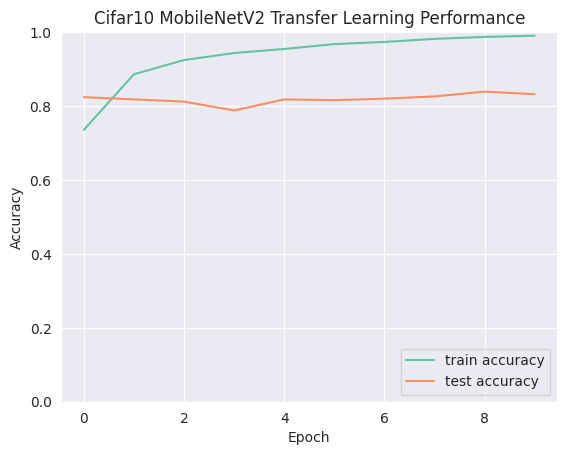

In [15]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Cifar10 MobileNetV2 Transfer Learning Performance')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>
